# Importing libraries and modules (Data Collection)


In [3]:
# Importing the libraries and modules necessary for our classification model.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Storing the dataset into a data frame variable.

data_frame = pd.read_csv('Dataset_7.0.csv')
data_frame

,Unnamed: 0,Symptom,Disease
0,0,"vomiting ,diarrhea ,side pain ,hemoptysis",acute pancreatitis
1,1,"sharp chest pain ,abusing alcohol ,sharp abdom...",acute pancreatitis
2,2,"abusing alcohol ,sharp abdominal pain ,nausea ...",acute pancreatitis
3,3,vomiting,acute pancreatitis
4,4,"abusing alcohol ,nausea ,diarrhea ,back pain ,...",acute pancreatitis
...,...,...,...
46569,46569,"itching of skin ,skin dryness, peeling, scalin...",eczema
46570,46570,skin rash,eczema
46571,46571,"skin lesion ,allergic reaction ,itching of ski...",eczema
46572,46572,"cough ,abnormal appearing skin ,skin dryness, ...",eczema


# Data Preprocessing


In [5]:
# 1. Taking care of missing data in the dataset.

# Attaining the sum of empty/missing values.
missing_values = data_frame.isnull().sum().sum()

if missing_values == 0:
  print("There is no missing data in the dataset.")
else:
  data_frame.dropna(inplace=True) # Dropping the missing entries.

There is no missing data in the dataset.


In [6]:
import re

# Function to clean symptom names dynamically (regular expressions)
def clean_symptoms(symptoms):
    # Removing trailing numeric suffixes and unwanted symbols
    return [re.sub(r'\d+$', '', re.sub(r'[^\w\s]', '', symptom.strip())) for symptom in symptoms]

In [7]:
from sklearn.preprocessing import MultiLabelBinarizer

"""
# 2. Applying multi label binarizer (version of multi-labeled one hot encoding)
     - Used for multi-labeled one-hot encoding (multiple symptoms)
"""
# Used for multi-labeled one-hot encoding (multiple symptoms)
mlb = MultiLabelBinarizer()

# Spliting the symptoms into lists
query_symptom_column = data_frame['Symptom'].str.split(',').apply(lambda x: clean_symptoms(x))

# Using MultiLabelBinarizer for multi-label one-hot encoding
mlb = MultiLabelBinarizer()
query_encoded = mlb.fit_transform(query_symptom_column)

# Converting back to DataFrame for better visualisation
encoded_columns = mlb.classes_
query_encoded_df = pd.DataFrame(query_encoded, columns=encoded_columns)

# Concatenating the one-hot encoded symptoms back to the original dataset
data_frame = pd.concat([data_frame.drop(columns=['Symptom']), query_encoded_df], axis=1)

In [8]:
# Ensuring the 'Disease' column is the last column (as it is the label)
columns = [col for col in data_frame.columns if col != 'Disease'] + ['Disease']
data_frame = data_frame[columns]
data_frame.drop(columns=['Unnamed: 0'], inplace=True)
data_frame

,abnormal appearing skin,abnormal breathing sounds,abnormal involuntary movements,abusing alcohol,ache all over,acne or pimples,allergic reaction,ankle pain,ankle swelling,anxiety and nervousness,...,vaginal pain,vomiting,vomiting blood,warts,weakness,weight gain,wheezing,wrist pain,wrist swelling,Disease
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,acute pancreatitis
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,acute pancreatitis
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,acute pancreatitis
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,acute pancreatitis
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,acute pancreatitis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,eczema
46570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,eczema
46571,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,eczema
46572,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,eczema


In [9]:
# Converting the data frame into a numpy array.

numpy_array = data_frame.to_numpy()
numpy_array

array([[0, 0, 0, ..., 0, 0, 'acute pancreatitis'],
       [0, 0, 0, ..., 0, 0, 'acute pancreatitis'],
       [0, 0, 0, ..., 0, 0, 'acute pancreatitis'],
       ...,
       [0, 0, 0, ..., 0, 0, 'eczema'],
       [1, 0, 0, ..., 0, 0, 'eczema'],
       [0, 0, 0, ..., 0, 0, 'eczema']], dtype=object)

In [10]:
# Splitting the dataset into training set and testing set (70/30) split.

from sklearn.model_selection import train_test_split

X = data_frame.drop(columns=['Disease']) # Features
y = data_frame['Disease'] # Label

# 70/30 split, where stratify allows for data consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Confirming the class distribution in training and testing sets
train_distribution = y_train.value_counts()
test_distribution = y_test.value_counts()

print("Training Set Distribution:\n", train_distribution)
print("\nTesting Set Distribution:\n", test_distribution)

Training Set Distribution:
 Disease
cystitis                              853
nose disorder                         853
vulvodynia                            853
complex regional pain syndrome        852
conjunctivitis due to allergy         851
spondylosis                           851
esophagitis                           851
diverticulitis                        850
gastrointestinal hemorrhage           850
hypoglycemia                          850
vaginal cyst                          850
peripheral nerve disorder             850
acute bronchitis                      849
spontaneous abortion                  848
fungal infection of the hair          848
pneumonia                             848
sprain or strain                      848
gout                                  848
infectious gastroenteritis            848
arthritis of the hip                  847
strep throat                          847
marijuana abuse                       847
injury to the arm                     84

# Model Selection

In [11]:
# Importing metrics for prediction results.

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## First Model (Decision Trees)

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Initialising the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Training the model
dt_model.fit(X_train, y_train)

# Making predictions
dt_predictions = dt_model.predict(X_test)

# Evaluate on training data
train_predictions = dt_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy:", train_accuracy)

# Evaluate on testing data
test_predictions = dt_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Testing Accuracy:", test_accuracy)

# Compare results
if train_accuracy - test_accuracy > 0.1:  # Example threshold
    print("Potentially Overfitted")
else:
    print("Model appears to generalize well.")


# Evaluating the model
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("\nClassification Report:\n", classification_report(y_test, dt_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, dt_predictions))

Training Accuracy: 0.9853378730713782
Testing Accuracy: 0.9256423101696128
Model appears to generalize well.
Accuracy: 0.9256423101696128

Classification Report:
                                     precision    recall  f1-score   support

               acute bronchiolitis       0.94      0.93      0.94       361
                  acute bronchitis       0.88      0.89      0.88       364
                acute pancreatitis       0.89      0.94      0.91       362
                           anxiety       0.99      0.98      0.98       359
              arthritis of the hip       0.96      0.96      0.96       363
benign prostatic hyperplasia (bph)       1.00      0.99      0.99       362
                          bursitis       0.99      0.98      0.98       362
                     cholecystitis       0.92      0.89      0.91       361
              chronic constipation       0.91      0.98      0.95       274
    complex regional pain syndrome       0.87      0.92      0.89       365


# Second Model (Support Vector Machines)

In [14]:
from sklearn.svm import SVC


# Initializing the Support Vector Machine Classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Training the model
svm_model.fit(X_train, y_train)

# Making predictions on the test set
svm_predictions = svm_model.predict(X_test)

# Evaluating on training data
svm_train_predictions = svm_model.predict(X_train)
svm_train_accuracy = accuracy_score(y_train, svm_train_predictions)
print("Training Accuracy:", svm_train_accuracy)

# Evaluating on testing data
svm_test_accuracy = accuracy_score(y_test, svm_predictions)
print("Testing Accuracy:", svm_test_accuracy)

# Checking for potential overfitting
if svm_train_accuracy - svm_test_accuracy > 0.1:
    print("Potentially Overfitted")
else:
    print("Model appears to generalize well.")

# Evaluate overall model performance
print("\nAccuracy:", svm_test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, svm_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, svm_predictions))

Training Accuracy: 0.9551240759485905
Testing Accuracy: 0.9397409289343734
Model appears to generalize well.

Accuracy: 0.9397409289343734

Classification Report:
                                     precision    recall  f1-score   support

               acute bronchiolitis       0.97      0.95      0.96       361
                  acute bronchitis       0.86      0.94      0.90       364
                acute pancreatitis       0.85      0.98      0.91       362
                           anxiety       0.99      1.00      1.00       359
              arthritis of the hip       0.98      0.97      0.98       363
benign prostatic hyperplasia (bph)       1.00      0.99      1.00       362
                          bursitis       1.00      0.99      1.00       362
                     cholecystitis       1.00      0.85      0.92       361
              chronic constipation       0.91      0.99      0.95       274
    complex regional pain syndrome       0.94      0.88      0.91       365

# Third Model (K-Nearest Neighbours)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Initializing the K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Training the model
knn_model.fit(X_train, y_train)

# Making predictions on the test set
knn_predictions = knn_model.predict(X_test)

# Evaluating on training data
knn_train_predictions = knn_model.predict(X_train)
knn_train_accuracy = accuracy_score(y_train, knn_train_predictions)
print("Training Accuracy:", knn_train_accuracy)

# Evaluating on testing data
knn_test_accuracy = accuracy_score(y_test, knn_predictions)
print("Testing Accuracy:", knn_test_accuracy)

# Checking for potential overfitting
if knn_train_accuracy - knn_test_accuracy > 0.1:
    print("Potentially Overfitted")
else:
    print("Model appears to generalize well.")

# Evaluate overall model performance
print("\nAccuracy:", knn_test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, knn_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, knn_predictions))

Training Accuracy: 0.9603386399190209
Testing Accuracy: 0.9356616331496458
Model appears to generalize well.

Accuracy: 0.9356616331496458

Classification Report:
                                     precision    recall  f1-score   support

               acute bronchiolitis       0.94      0.95      0.95       361
                  acute bronchitis       0.90      0.91      0.90       364
                acute pancreatitis       0.88      0.93      0.90       362
                           anxiety       0.99      1.00      0.99       359
              arthritis of the hip       0.98      0.97      0.97       363
benign prostatic hyperplasia (bph)       1.00      0.99      1.00       362
                          bursitis       1.00      0.99      0.99       362
                     cholecystitis       0.91      0.90      0.91       361
              chronic constipation       0.90      0.97      0.94       274
    complex regional pain syndrome       0.89      0.91      0.90       365

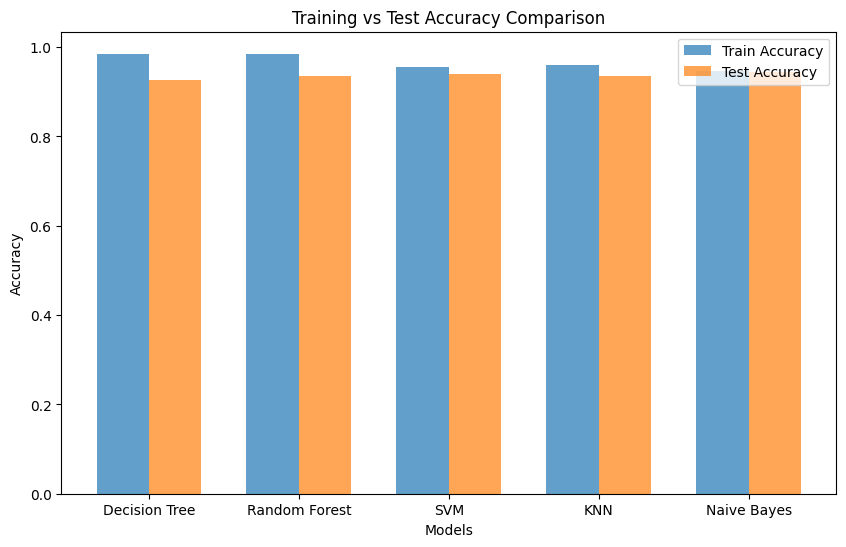

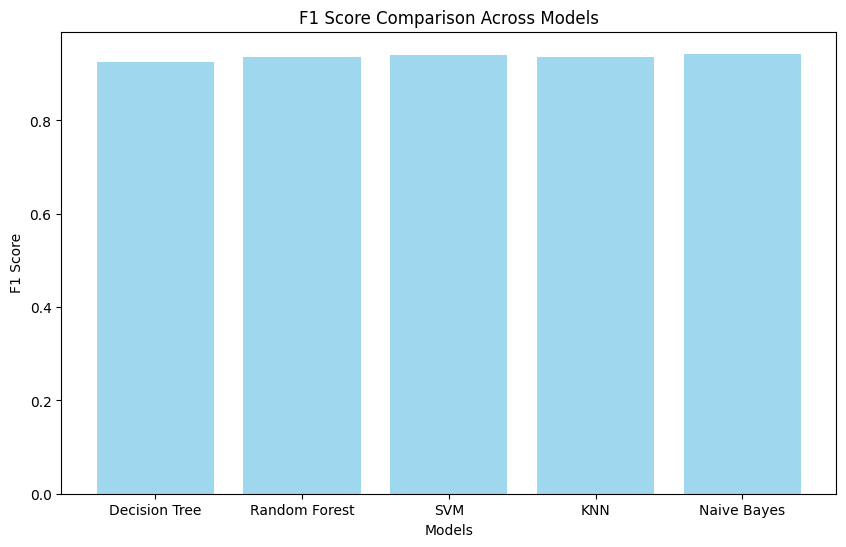

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

# Define models and their metrics
models = ["Decision Tree", "Random Forest", "SVM", "KNN", "Naive Bayes"]

# Replace these with actual accuracy values from your notebook
train_accuracies = [train_accuracy, svm_train_accuracy, knn_train_accuracy]
test_accuracies = [test_accuracy, svm_test_accuracy, knn_test_accuracy]

# Replace these with actual F1 scores
f1_scores = [
    f1_score(y_test, dt_predictions, average="weighted"),
    f1_score(y_test, svm_predictions, average="weighted"),
    f1_score(y_test, knn_predictions, average="weighted"),
]

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
bar_width = 0.35

plt.bar(x - bar_width/2, train_accuracies, bar_width, label="Train Accuracy", alpha=0.7)
plt.bar(x + bar_width/2, test_accuracies, bar_width, label="Test Accuracy", alpha=0.7)
plt.xticks(x, models)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Training vs Test Accuracy Comparison")
plt.legend()
plt.show()

# Plot F1 Score Comparison
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color="skyblue", alpha=0.8)
plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison Across Models")
plt.show()

# Confusion Matrix Visualization for each model
confusion_matrices = [
    confusion_matrix(y_test, dt_predictions),
    confusion_matrix(y_test, svm_predictions),
    confusion_matrix(y_test, knn_predictions),
]

for i, cm in enumerate(confusion_matrices):
    plt.figure
